# Introduction to Python Image Processing
There are many tools available for image processing in python.  We will do some very simple excercises that will prepare you to think about images as data and some simple tools for manipulating that data

In [1]:
#PIL is pillow--the standard python imaging library
from PIL import Image
#tifffile reads tif's into a multidimensional array
import tifffile
#matplotlib let's us plot data
import matplotlib.pyplot as plt
#the matplotlib colors library let's us display those with colormaps
from matplotlib import colors
#pandas handles tables
import pandas as pd
#numpy handles multidimensional data sets
import numpy as np

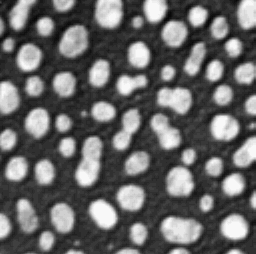

In [2]:
#let's open a blobs image in the matplotlib image viewer
img=Image.open('blobs.tif')
#if we output an image, jupyter knows to show it as an image
img

In [3]:
#that was cool but makes it difficult to see the image data
#if we load it with tifffile, we get a better look at things
img2=tifffile.imread('blobs.tif')
img2

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)

Here we see that the image is an array that contains lots of other arrays (rows of the image)

In [4]:
#let's put it in a dataframe so we can look at it easier
imgdf=pd.DataFrame(img2)
print(imgdf.shape)
imgdf.head(20)

(254, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,40,32,24,24,16,24,24,32,32,32,...,232,240,240,240,240,240,232,216,200,200
1,56,40,24,24,24,32,32,32,32,32,...,240,248,248,248,248,240,240,232,216,216
2,64,48,24,32,32,32,32,32,32,32,...,248,248,248,248,248,248,240,240,232,232
3,40,40,32,40,40,40,40,32,32,24,...,248,248,248,248,248,248,248,240,232,232
4,16,24,32,40,48,48,40,32,24,24,...,248,248,240,248,248,248,248,240,232,232
5,24,32,40,48,56,48,40,32,24,24,...,240,240,240,240,240,240,240,240,232,232
6,32,40,48,56,56,48,32,24,16,16,...,232,232,232,232,232,232,232,232,232,232
7,40,48,48,56,56,40,32,24,16,24,...,232,232,232,232,232,232,232,232,232,232
8,48,48,48,48,48,40,24,24,16,24,...,232,232,232,232,232,232,232,232,232,232
9,48,48,48,48,40,40,32,32,24,40,...,232,232,232,232,232,232,232,232,224,224


This table has a number for each pixel in the image.
We can think of that number as an "intensity" or perhaps as a "color"

In [5]:
#let's use describe to get some stats on each image "column" of pixels
imgdf.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,96.251969,98.425197,97.637795,100.125984,99.401575,102.992126,103.590551,105.354331,104.188976,106.047244,...,108.251969,109.826772,108.881890,111.842520,111.716535,114.488189,113.763780,114.582677,112.094488,112.094488
std,69.919431,71.234681,74.511072,73.557914,74.844266,73.317707,73.844335,71.089047,70.082248,67.400503,...,76.434784,76.934559,79.855068,79.541614,81.162590,80.051255,81.366439,79.612544,79.944589,79.944589
min,8.000000,16.000000,16.000000,24.000000,8.000000,16.000000,8.000000,16.000000,16.000000,16.000000,...,16.000000,24.000000,16.000000,24.000000,24.000000,24.000000,16.000000,16.000000,16.000000,16.000000
25%,40.000000,42.000000,40.000000,40.000000,40.000000,48.000000,40.000000,48.000000,48.000000,48.000000,...,40.000000,48.000000,48.000000,48.000000,40.000000,48.000000,40.000000,48.000000,48.000000,48.000000
50%,64.000000,56.000000,56.000000,56.000000,64.000000,64.000000,64.000000,64.000000,64.000000,76.000000,...,64.000000,64.000000,64.000000,72.000000,64.000000,64.000000,68.000000,72.000000,64.000000,64.000000
75%,160.000000,158.000000,160.000000,174.000000,182.000000,182.000000,184.000000,184.000000,184.000000,176.000000,...,192.000000,198.000000,208.000000,208.000000,208.000000,206.000000,200.000000,208.000000,206.000000,206.000000
max,240.000000,240.000000,248.000000,248.000000,248.000000,240.000000,232.000000,232.000000,232.000000,232.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000


A few things about these data: the maximum values for each column are around 250.
The minimum values are around 10.

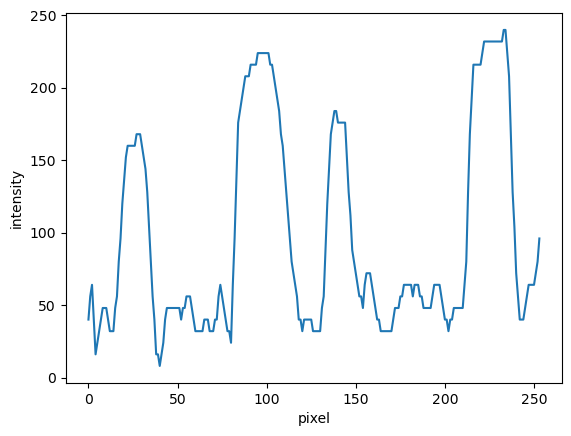

In [7]:
#let's plot the intensities in the first column
#we will use the matplotlib pyplot plot function which simply plots a list of data
plt.plot(imgdf[0])
plt.xlabel('pixel')
plt.ylabel('intensity')
plt.show()

Looking at the image above on the left side, we see 4 white blobs.  Those correspond to the high intensity values in our plot. We see those values as "white" in the image above but they could be a different color too.

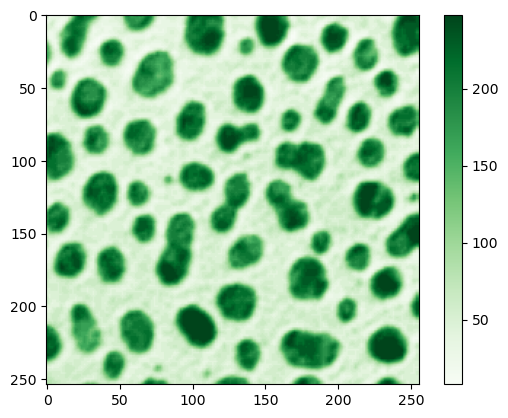

In [8]:
#matplotlib's imshow let's us show data as images in other ways
plt.imshow(img2,cmap='Greens')
plt.colorbar()

In that version of things high intensities are dark green while low intensities are light green.  The colormap (cmap argument in imshow) maps how different colors are displayed.  The colorbar at the right shows how this mapping is done.  There are a large variety of ways that colormapping can be done.  Let's explore this a bit more.  Computer colors are usually a mixture of red, green, and blue colors.  If only the red color get's brighter at higher image intensities, we have a red colormap:

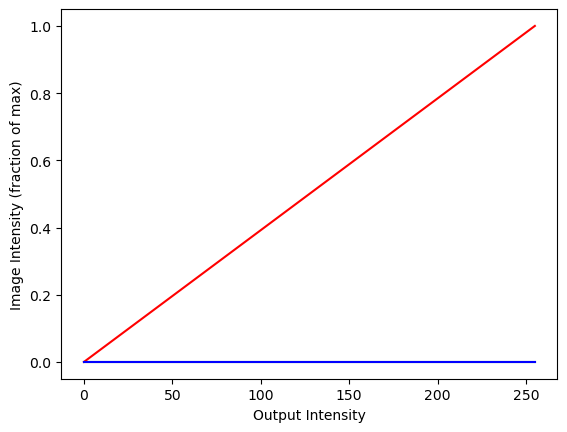

In [9]:
redmap=np.arange(256)/255.0
greenmap=np.zeros(256)
bluemap=np.zeros(256)
plt.plot(redmap,'r')
plt.plot(greenmap,'g')
plt.plot(bluemap,'b')
plt.xlabel('Output Intensity')
plt.ylabel('Image Intensity (fraction of max)')
plt.show()

Now let's show the corresponding image for that colormap.

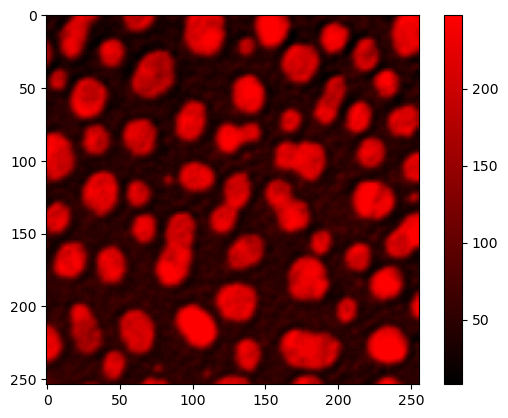

In [10]:
redcmap=colors.ListedColormap(np.array([redmap,greenmap,bluemap]).T)
plt.imshow(img2,cmap=redcmap)
plt.colorbar()
plt.show()

If we swap the red and green here we have a green colormap.

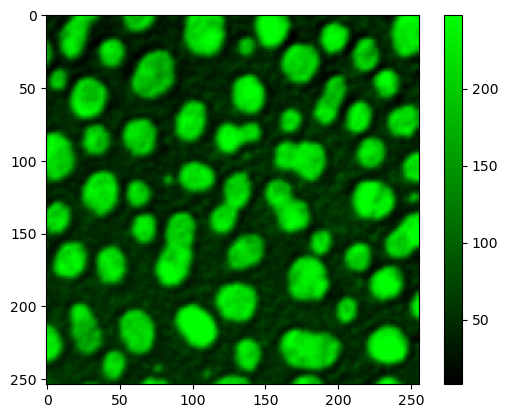

In [11]:
greencmap=colors.ListedColormap(np.array([greenmap,redmap,bluemap]).T)
plt.imshow(img2,cmap=greencmap)
plt.colorbar()
plt.show()

Scientific images can have a large range of intensities. We have to decide how bright everything should be in the display. The software usually set's the maximum intensity in the image to be the maximum displayed value.  We can change that value to brighten or dim the image.

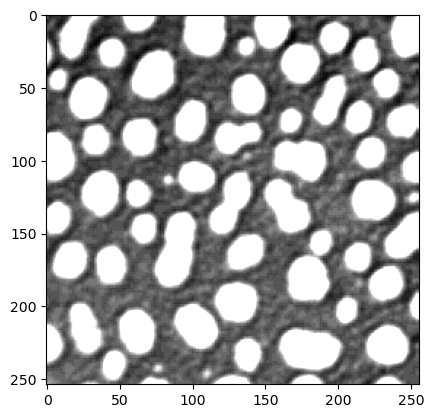

In [12]:
#let's brighten our image up by setting the display maximum to 128
plt.imshow(img2,cmap='gray',vmax=128)

Now "white" in the image is at the intensity value of 128 rather than around 250 as above.  Anything above 128 shows up as white as well.

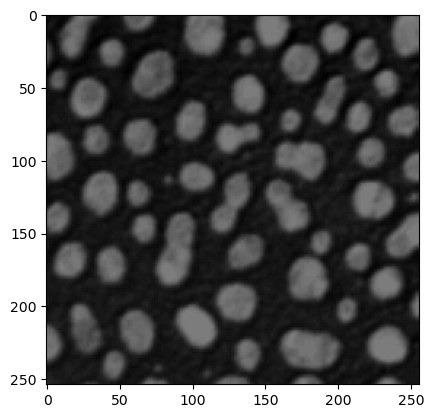

In [13]:
#let's try going the other way and setting the maximum to 500
plt.imshow(img2,cmap='gray',vmax=500)

Now "white" is 500 and none of our pixels are bright enough to reach that level.  We can also set the minimum display value.

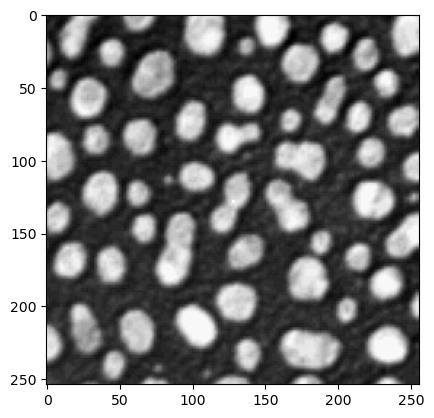

In [16]:
img3=img2.astype(float)
img3[128,128]=3000
plt.imshow(img3,cmap='gray',vmax=255)

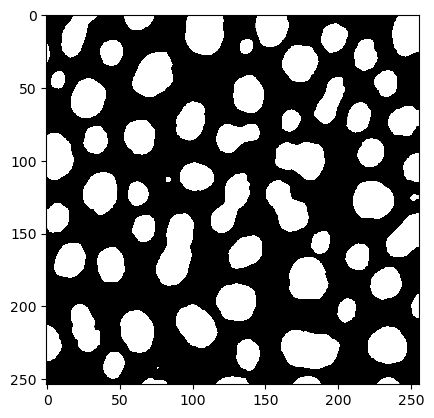

In [17]:
#what if we set the display range very narrowly: between 127 and 128
plt.imshow(img2,cmap='gray',vmin=127,vmax=128)

Now everything below 127 is black and everything above 128 is white, effectively giving us a black and white image. The range of values that are shown in an image is called "contrast". The overall intensity of the image is called "brightness". We can utilize a black and white image like the one above to measure things about our image.

In [18]:
#lets' count the number of pixels above 128
bwdf=imgdf>128
bwdf.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [19]:
#the pandas sum function counts the number of true values, call it twice for the overall sum
countwhite=bwdf.sum().sum()
countwhite

21413

In [20]:
#so 21413 pixels are white, how many pixels are in our image?
total_pixels=bwdf.shape[0]*bwdf.shape[1]
total_pixels

65024

In [21]:
countwhite/total_pixels

0.3293091781496063

Now we know that around 1/3 of our pixels are above 128 intensity.

Let's open a color image and see how that's different than our black and white image.

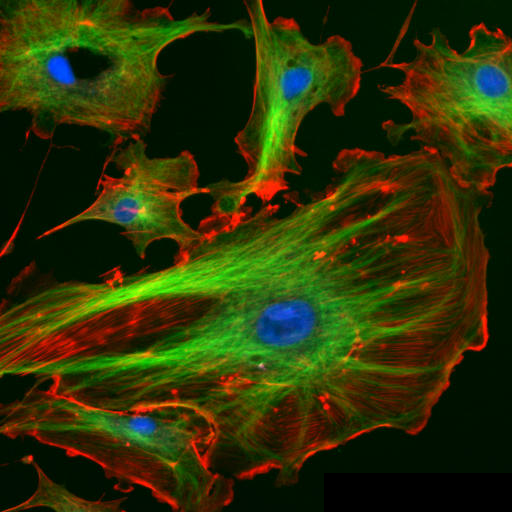

In [22]:
#first view it with the standard library as before
Image.open('FluorescentCells.tif')

Pretty! Let's see what this data looks like.

In [24]:
cimg=tifffile.imread('FluorescentCells.tif')
cimg.shape # width x height x channels

(512, 512, 3)

The .shape attribute is used in numpy and in pandas and tells us the sizes of all of the dimensions of a multidimensional array.  Here we have 3 dimensions: y, x, and color.  Digital color images are typically in RGB format, i.e. there is a separate image for red, green and blue that is rendered by red, green and blue pixels in your computer screen.  We can use "slicing" to get different dimensions.  The ":" symbol means we want all of that dimensions values.  Let's use this to look at just one of the colors of our image.

In [39]:
c1df=pd.DataFrame(cimg[:,:,0]) # all pixels for red channel (0 channel = red)
c1df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,16,15,18,21,19,14,13,17,22,17,...,0,0,0,0,0,0,0,0,0,0
1,13,13,15,19,18,15,15,18,25,21,...,0,0,0,0,0,0,0,0,0,0
2,12,12,13,17,18,15,18,24,28,23,...,0,0,0,0,0,0,0,0,0,0
3,12,12,12,16,18,17,21,27,26,20,...,0,0,0,0,0,0,0,0,0,0
4,15,12,14,16,16,18,24,32,20,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,0,0,7,8,5,0,0,3,3,...,0,0,0,0,0,0,0,0,0,0
508,16,10,3,0,0,0,0,0,42,72,...,0,0,0,0,0,0,0,0,0,0
509,13,0,0,0,2,45,89,120,158,166,...,0,0,0,0,0,0,0,0,0,0
510,0,0,13,44,85,130,171,194,163,140,...,0,0,0,0,0,0,0,0,0,0


This is just a grayscale image like our blobs image above.  Let's see what it looks like.

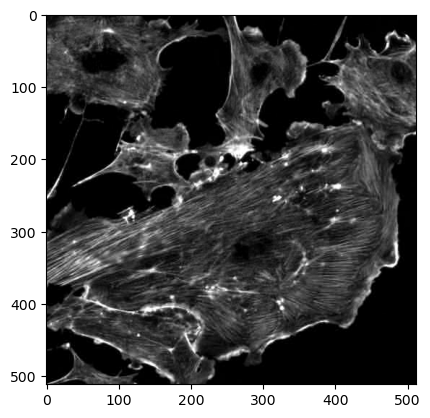

In [40]:
plt.imshow(c1df,cmap='gray')

This looks just like the red color above!  So the first color in a color image is red.  Let's use the subplot feature of matplotlib to show all of the colors side by side.

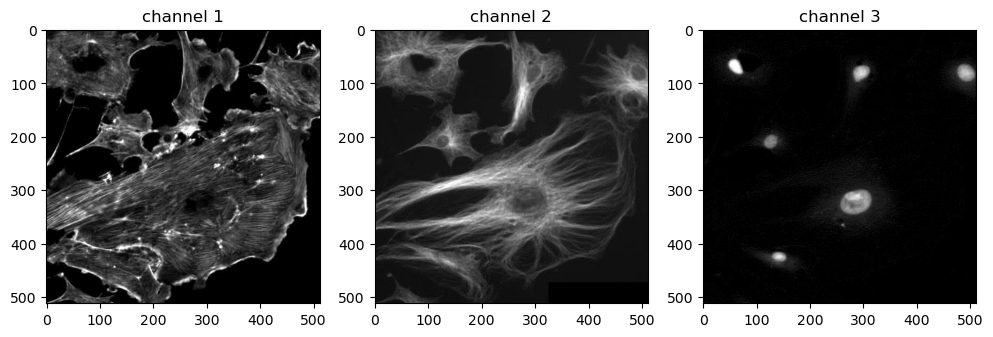

In [42]:
#start by making our figure a bit bigger so it's easier to see
plt.figure(figsize=(12,4))
#the subplot command let's us specify the dimensions of our plotting grid: here we have 1 row and 3 columns
ax=plt.subplot(1,3,1) # 1 row, 3 columns, this is the 1st column
#ax is an axes object, we can use similar commands to the plt object
ax.imshow(cimg[:,:,0],cmap='gray')
ax.set_title('channel 1')
ax=plt.subplot(1,3,2)
ax.imshow(cimg[:,:,1],cmap='gray')
ax.set_title('channel 2')
ax=plt.subplot(1,3,3)
ax.imshow(cimg[:,:,2],cmap='gray')
ax.set_title('channel 3')
plt.show()

So now you know how to make RGB images: you just put (r,g,b) values in each pixel position.  We can turn our red image into a magenta image by copying it into the 1st and 3rd channels of a blank image.  Red and blue make magenta.

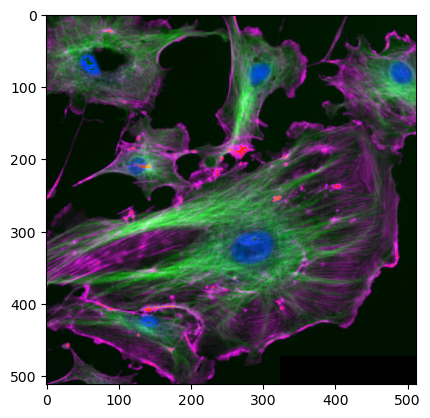

In [56]:
#this makes a blank image with the same shape as the one we imported
cimg2=np.zeros(cimg.shape,dtype=np.uint8)
#set the red channel
cimg2[:,:,0]=cimg[:,:,0] # put "red (0)" in the red channel
#set the blue channel
cimg2[:,:,2]=cimg[:,:,0] # put "red (0)" in the blue channel (blue + red = magenta)
cimg2[:,:,2]+=cimg[:,:,2] # and put "blue (2)" in the blue channel
#keep the green channel as it was
cimg2[:,:,1]=cimg[:,:,1] # put "green (1)" in the green channel
plt.imshow(cimg2)#
plt.show()

Mixing colors can be tricky but fun!  Note that computer screens can only display between 0 and 255 intensity levels, so if you add too many images in a channel everything will saturate.  Anyway, play and have fun and see what you can create!